# EMIBA - EDA ROSSMAN
## César Hernández

In [4]:
!pip install missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Preliminary Data Processing

In [4]:
df = pd.read_csv('rossman_sales.csv', low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Let's create the feature average ticket:

In [7]:
df['avg_ticket'] = df['Sales']/df['Customers']

In [9]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [11]:
df['StateHoliday'] = df['StateHoliday'].astype('category')

### Change data types 

In [14]:
# set identifier "Store" as string
df['Store'] = df['Store'].astype('str')
# set categorical data
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df['Open'] = df['Open'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['StateHoliday'] = df['StateHoliday'].astype(str).str.strip().astype('category')
df['SchoolHoliday'] = df['SchoolHoliday'].astype('category')
# set datetime data
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# set identifier "Store" as string
df['Store'] = df['Store'].astype('str')
# set categorical data
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df['Open'] = df['Open'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['StateHoliday'] = df['StateHoliday'].astype('category')
df['SchoolHoliday'] = df['SchoolHoliday'].astype('category')
# set datetime data
df['Date'] = pd.to_datetime(df['Date'])

## Our EDA Begins

### Code for checking missing values:


Preview of data with null values:
xxxxxxxxxxxxx
     Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
291    292         5 2015-07-31      0          0    0     1            0   
875    876         5 2015-07-31      0          0    0     1            0   
1406   292         4 2015-07-30      0          0    0     1            0   

     SchoolHoliday  avg_ticket  
291              1         NaN  
875              1         NaN  
1406             1         NaN  


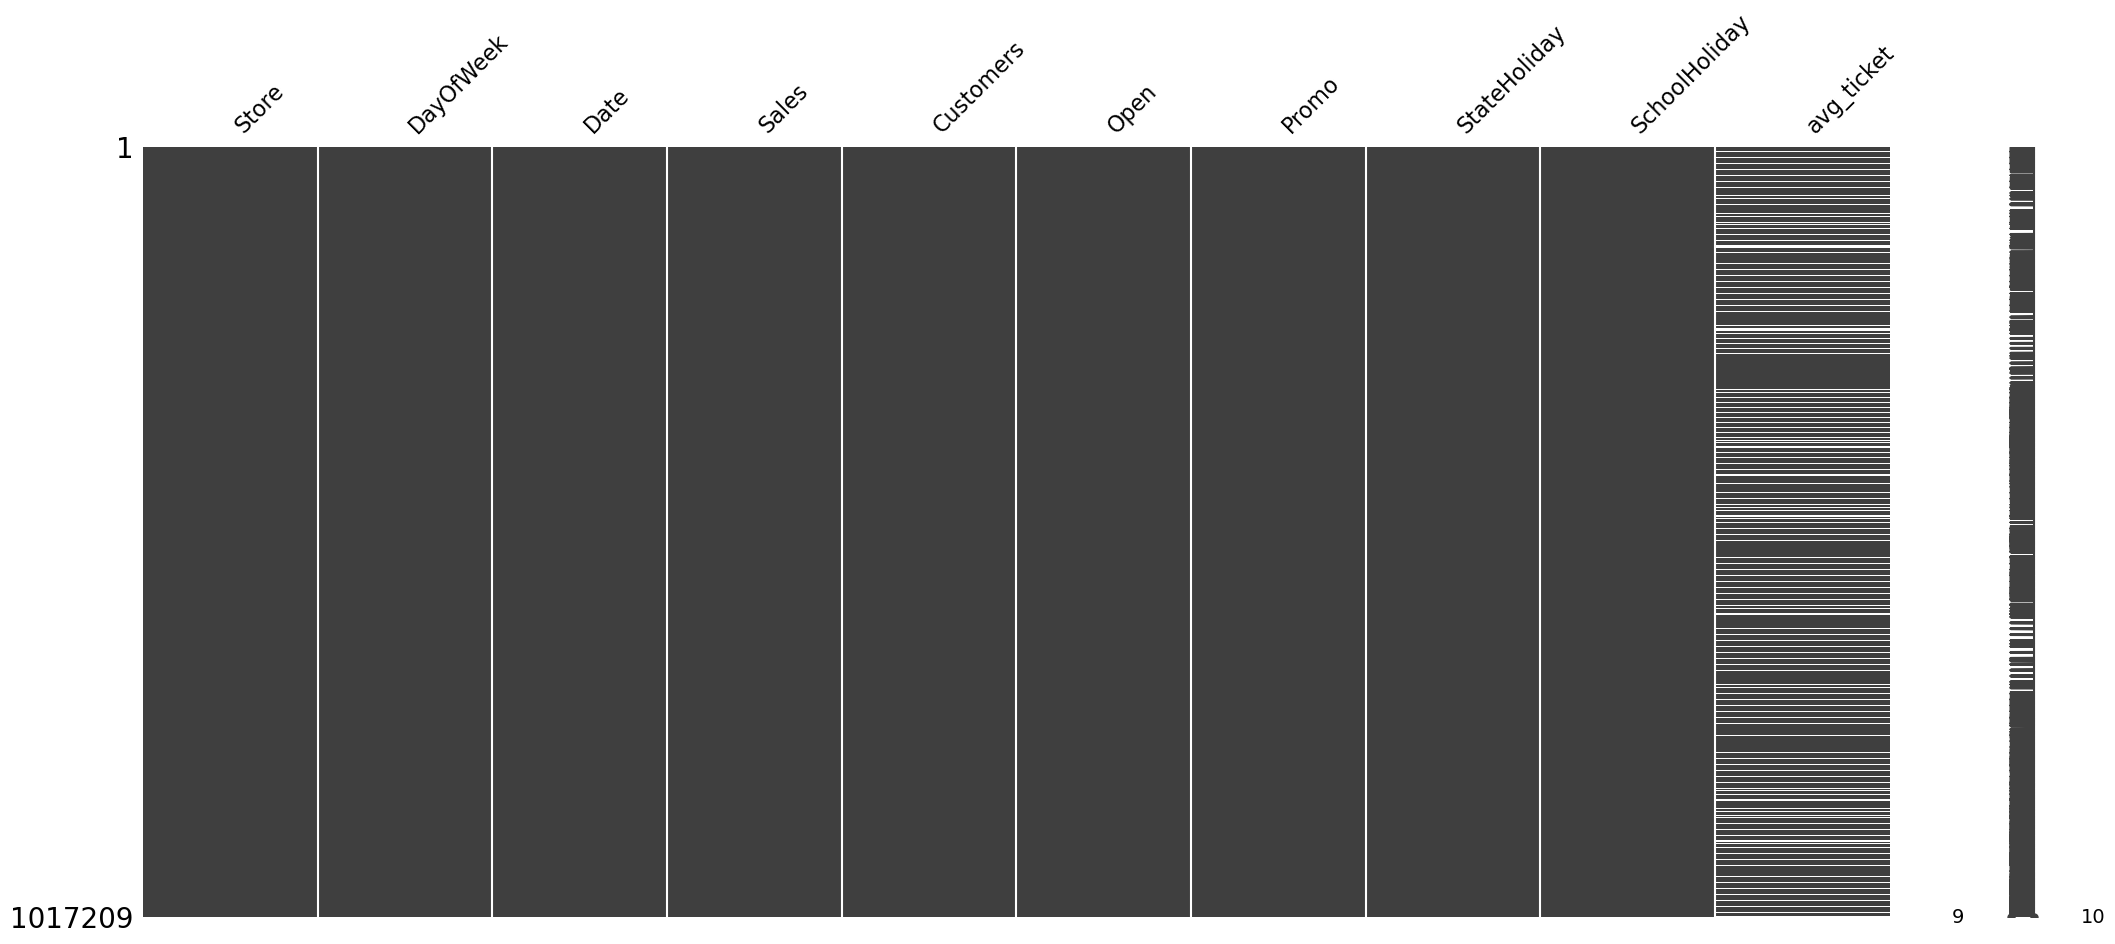

In [20]:
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

avg_ticket is null when we divide 0 sales per 0 customers.

In [22]:
df[df['avg_ticket'].isnull()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,avg_ticket
291,292,5,2015-07-31,0,0,0,1,0,1,NaN
875,876,5,2015-07-31,0,0,0,1,0,1,NaN
1406,292,4,2015-07-30,0,0,0,1,0,1,NaN
1990,876,4,2015-07-30,0,0,0,1,0,1,NaN
2521,292,3,2015-07-29,0,0,0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,NaN


We want to have a 0 average ticket the days there is no customer.

In [24]:
df['avg_ticket'].fillna(0, inplace = True)
df['avg_ticket'] = df['avg_ticket'].fillna(0)

### Code for checking duplicates:

In [26]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


### Code for dropping duplicates:

In [32]:
df.drop_duplicates(inplace=True)

## Categorical data EDA

This code will show the 5 values with most occurrences in a categorical feature and after that plot a bar count plot for each one of them.

To check: Unique count of non-numeric data
DayOfWeek        7
Open             2
Promo            2
StateHoliday     4
SchoolHoliday    2
dtype: int64
Top 5 unique values of Store
  Count  count
0  1115    942
1     1    942
2     2    942
3     3    942
4     4    942
 
Top 5 unique values of DayOfWeek
  Count   count
0     4  145845
1     5  145845
2     3  145665
3     2  145664
4     1  144730
 
Top 5 unique values of Open
  Count   count
0     1  844392
1     0  172817
 
Top 5 unique values of Promo
  Count   count
0     0  629129
1     1  388080
 
Top 5 unique values of StateHoliday
  Count   count
0     0  986159
1     a   20260
2     b    6690
3     c    4100
 
Top 5 unique values of SchoolHoliday
  Count   count
0     0  835488
1     1  181721
 


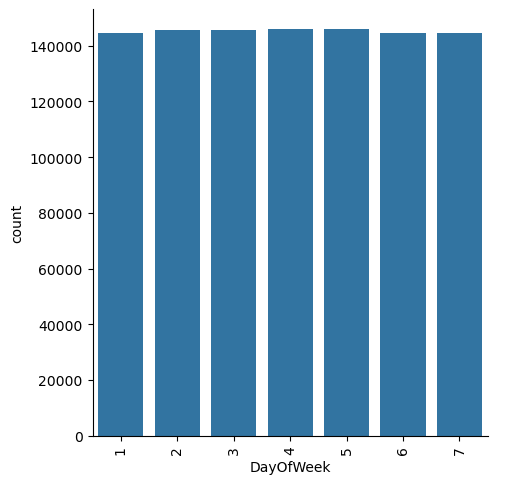

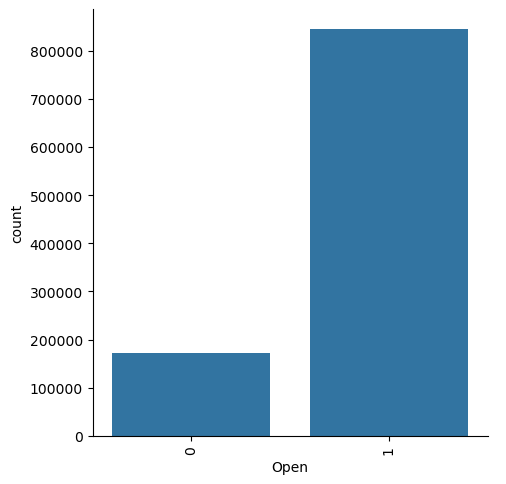

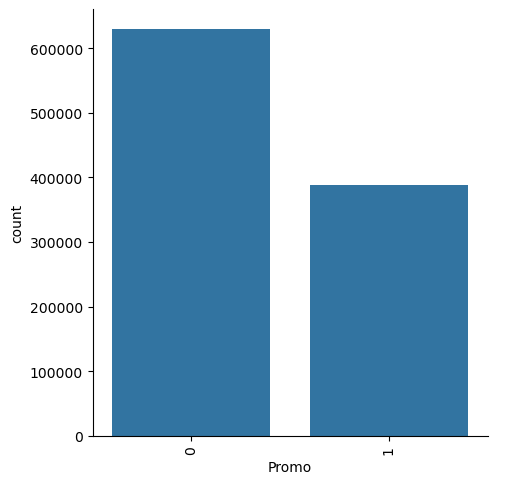

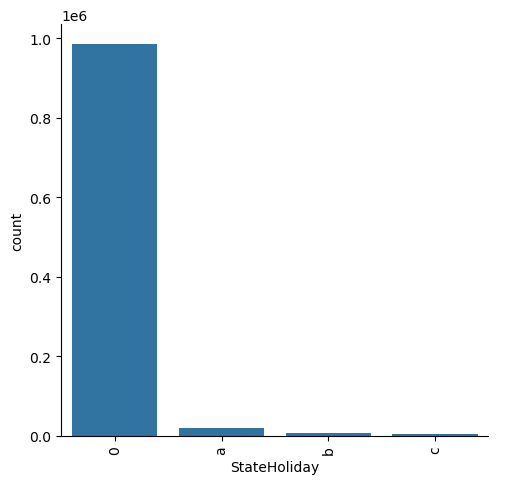

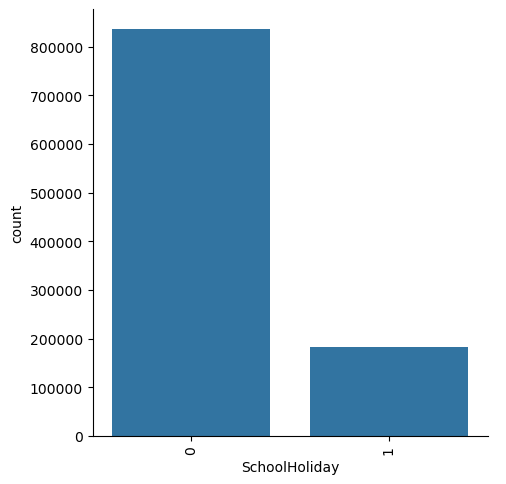

In [36]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()

categorical_eda(df)

## Numerical EDA

In [39]:
df['Store'].nunique()

1115

In [40]:
df_highest = df[df['Sales']>30000]

In [41]:
df_highest['Store'].nunique()

25

### Multivariate Analysis
#### Correlation Matrix for numerical values

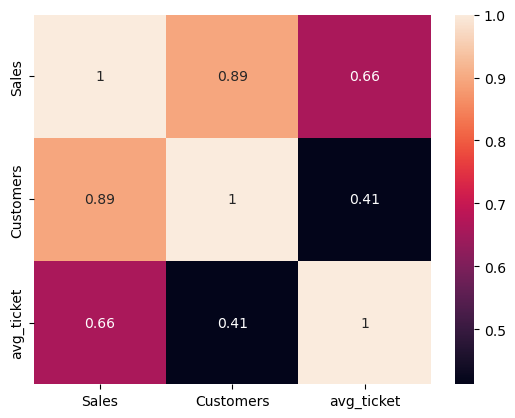

In [43]:
corrMatrix = df.corr(numeric_only = True)
sns.heatmap(corrMatrix, annot=True)
plt.show()